## Yum or Yuck Butterfly Mimics 2022 – Explore Dataset

**Author:** [Keith Pinson](https://github.com/keithpinson)<br>
**Date created:** 2022/06/28<br>
**Version:** 1.0.0001<br>
**Description:** Explore the dataset<br>


In [1]:
import datetime

print("executed",datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),"local time")

executed 2022-07-11 17:52:18 local time


## &nbsp;
---
## Set Environment
---

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from skimage import io


### <u>Dataset paths and names</u>

In [3]:
dataset_name = "YOYMimics-2022-dataset"

# Setting the variables assuming a Windows platform
base_dir = "."
data_dir = os.path.join(base_dir, dataset_name, 'data', 'butterfly_mimics')
working_dir = os.path.join(os.environ.get("HOMEPATH"), dataset_name)
temp_dir = os.path.join(os.environ.get("TMP"), dataset_name)

train_dir = os.path.join(data_dir, 'images')
test_dir = os.path.join(data_dir, 'image_holdouts')
train_csv = os.path.join(data_dir, 'images.csv')
test_csv = os.path.join(data_dir, 'image_holdouts.csv')
submit_csv = os.path.join(base_dir, 'sample_submission.csv')

# We will create these files from the provided csv files
working_train_csv = os.path.join(working_dir, 'working_images.csv')
working_test_csv = os.path.join(working_dir, "working_image_holdouts.csv")

### &nbsp;
---
### Check our Dataset Environment
---


### First, what does our directory structure look like?
```
.
├── image_holdouts
│   ├── gna250129d.jpg
│   ├── goabc6e644.jpg
│   ├── gpcb27504e.jpg
╎   ╎
│   └── zx54a72a62.jpg
├── images
│   ├── ggc1e08cbc.jpg
│   ├── gh150f104b.jpg
│   ├── gh20ab0d9c.jpg
╎   ╎
│   └── zze50f4f4f.jpg
├── image_holdouts.csv
└── images.csv
```

### <u>Datasets</u>

Notice that the folder names nor do the file names indicate the butterfly species. This information is contained in the CSV files. So we will have to read the `'images.csv'` to get the training labels.

In this notebook we will not transform the csv datasets to Tensorflow datasets. Please see the baseline notebook for an example of how to map the 'image' field to features and labels.

In [4]:
# Extract the dataset
train_csv_data = pd.read_csv(train_csv)
test_csv_data = pd.read_csv(test_csv)

### &nbsp;
---
### Explore Training Dataset
---


### What do the csv files look like?

In [5]:
print("From the images.csv file:")
print("-------------------------")
train_csv_data.head()

From the images.csv file:
-------------------------


,image,name,stage,side
0,ggc1e08cbc,monarch,adult,ventral
1,gh150f104b,tiger,adult,both
2,gh20ab0d9c,black,adult,dorsal
3,gh2d5c8c79,monarch,adult,dorsal
4,gh6adf74a4,pipevine,adult,dorsal


The `'image'` field will be transformed to the image feature and the `'name'` will be encoded to become the label. The `'stage'` field can be dropped since there are no caterpillars in the dataset. Advanced models may find the `'side'` field useful.

### &nbsp;
### What species of butterflies do we have?

In [6]:
print(train_csv_data['name'].unique())

['monarch' 'tiger' 'black' 'pipevine' 'viceroy' 'spicebush']


### &nbsp;
### How many images of each do we have?

In [7]:
print("Total:\t\t", train_csv_data['name'].count())
print("")
print(train_csv_data['name'].value_counts())

Total:		 853

pipevine     192
black        160
tiger        152
monarch      132
viceroy      109
spicebush    108
Name: name, dtype: int64


### &nbsp;
### Let's visualize the count

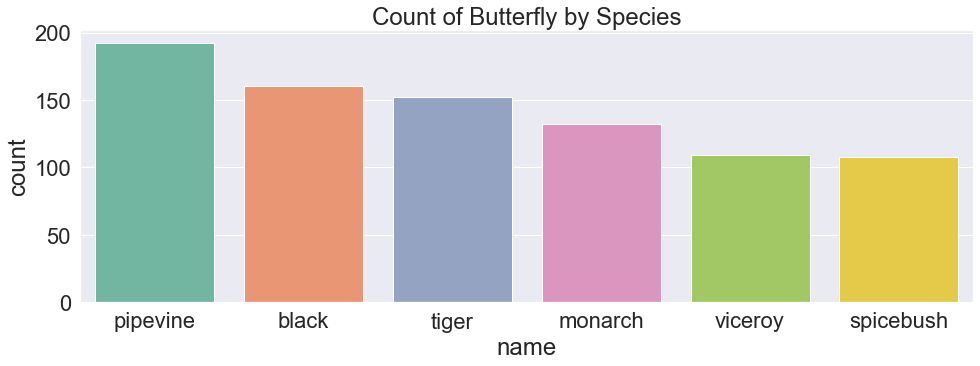

In [8]:
fig = plt.figure(figsize=(16, 5))
sns.set_theme(font_scale=2,palette="Set2")
sns.countplot(x=train_csv_data['name'],
            order=train_csv_data['name'].value_counts().index).set(title='Count of Butterfly by Species')
plt.xticks(rotation=0);

### &nbsp;
### Let's visualize the size of the image data?

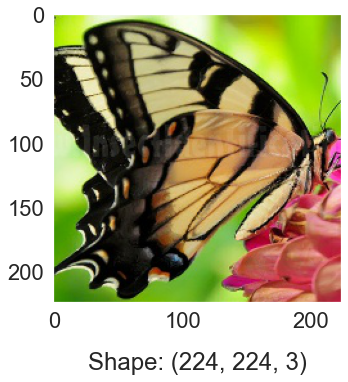

In [9]:
first_file = os.path.join(train_dir, train_csv_data.image[1]+".jpg")

image = io.imread(first_file, as_gray=False)

figure = plt.figure()
ax = figure.add_axes([0, 0, 1, 1])

ax.grid(None)
ax.axis('on')

ax.xaxis.labelpad = 20
ax.xaxis.set_label_text(f'Shape: {image.shape}')
plt.imshow(image,  interpolation_stage='rgb')
plt.show()



All images are 224x224 pixel RGB photos.

### &nbsp;
### What do the images look like?

In [10]:
# Run or re-run this to start at the first image
j = 0


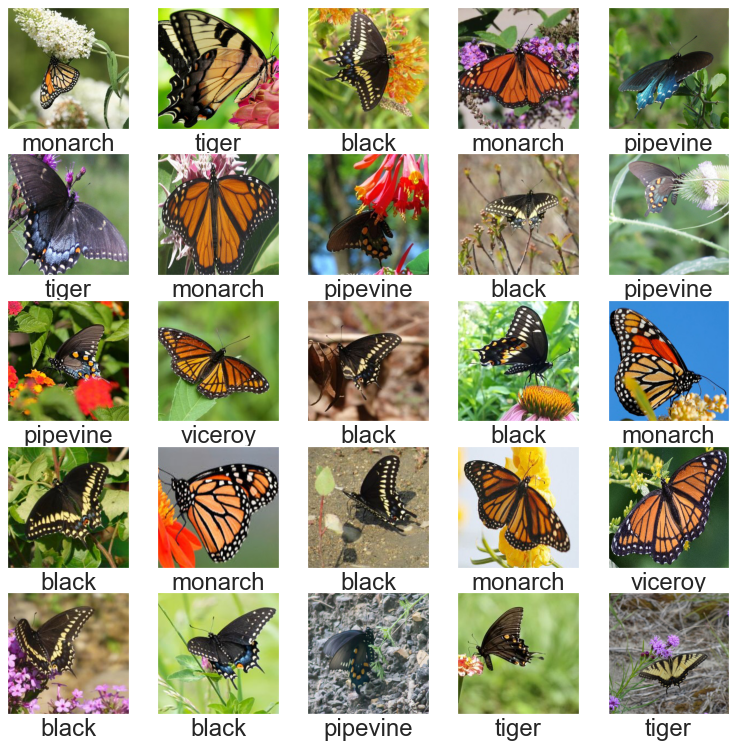

In [11]:
# Run this cell over and over to step through the images

fig, ax = plt.subplots(5, 5, figsize=(13, 13))

maxloop = len(train_csv_data)//25

if j <= maxloop:
    for i, axi in enumerate(ax.flat):
        k = (j*25) + i

        if k < len(train_csv_data):
            file = os.path.join(train_dir, train_csv_data.image[k]+".jpg")
            image = io.imread(file, as_gray=False)

            axi.grid(None)
            axi.axis('on')

            axi.imshow(image, interpolation_stage='rgb')
            axi.set(xticks=[], yticks=[], xlabel = train_csv_data.name[k])
        else:
            axi.set_visible(False)

    j = j + 1
    plt.show()

### &nbsp;
### Do we have any missing data?

In [12]:
print("Missing data from the images.csv file:")
print("--------------------------------------")
train_csv_data.isna().sum()

Missing data from the images.csv file:
--------------------------------------


image    0
name     0
stage    0
side     0
dtype: int64

### &nbsp;
---
### Explore Test Dataset
---


### What do the test csv files look like?

In [13]:
print("From the image_holdouts.csv file:")
print("---------------------------------")

test_csv_data.head()

From the image_holdouts.csv file:
---------------------------------


,image
0,goabc6e644
1,gpcb27504e
2,gsc64524dc
3,guf6eae7c8
4,gw3d42f465


### &nbsp;
### What do the test images look like?

In [14]:
# Run and then re-run this cell to start with the first image
j = 0

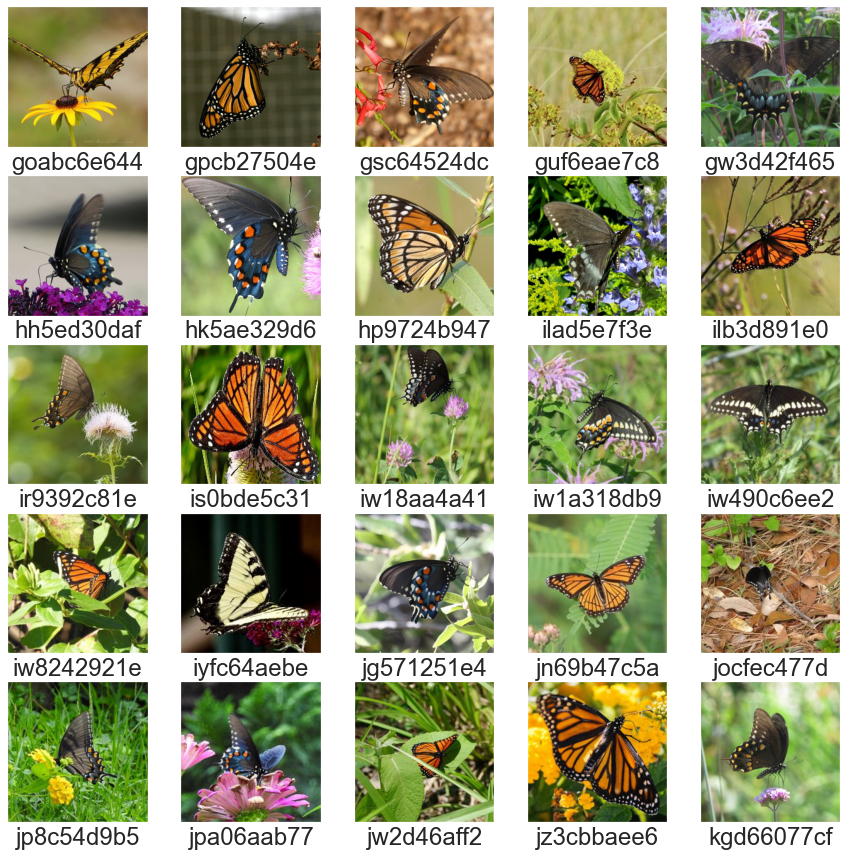

In [15]:

fig, ax = plt.subplots(5, 5, figsize=(15, 15))

maxloop = int(len(test_csv_data)/25)+1

if j < maxloop:
    for i, axi in enumerate(ax.flat):
        k = (j*25) + i

        if k < len(test_csv_data):
            file = os.path.join(test_dir, test_csv_data.image[k]+".jpg")
            image = io.imread(file, as_gray=False)

            axi.grid(None)
            axi.axis('on')

            axi.imshow(image, interpolation_stage='rgb')
            axi.set(xticks=[], yticks=[], xlabel = test_csv_data.image[k])
        else:
            axi.set_visible(False)

    j = j + 1
    plt.show()

### &nbsp;
---
### Explore Submissions
---

### What should a submission look like?

In [16]:
print("Example Submission")
print("------------------")
submit_ds = pd.read_csv(submit_csv)
submit_ds.head()

Example Submission
------------------


,image,name,confidence
0,gna250129d,black,0.75
1,goabc6e644,monarch,0.75
2,gpcb27504e,pipevine,0.75
3,gsc64524dc,spicebush,0.75
4,guf6eae7c8,tiger,0.75


The name is submitted with a confidence value, for example image `goabc6e644` is a `monarch` with 75% confidence.

### &nbsp;
### That's it. Everything looks good!